<a href="https://www.kaggle.com/code/fajarathallah/clustering-football-team?scriptVersionId=197115951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Perbandingan algoritma K-Means dengan Fuzzy C- Means dalam analisis gerombol terhadap klub sepakbola Inggris**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/englsih-football/ENGLAND-Football-Dataset.csv


**Input dan analisis data**

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/englsih-football/ENGLAND-Football-Dataset.csv')

# Print the first 5 rows of the dataset
df.head()

,tournament,home,home_goal,away_goal,away,home_corner,away_corner,home_attack,away_attack,home_shots,away_shots,time,date,ht_diff,at_diff,ht_result,at_result,total_corners
0,Premier League,Arsenal,0.0,0.0,Chelsea,0.0,0.0,NaN,NaN,NaN,NaN,20:00:00,2023-05-02,0.0,0.0,DRAW,DRAW,0.0
1,Premier League,Leicester,0.0,0.0,Everton,0.0,0.0,NaN,NaN,NaN,NaN,20:00:00,2023-05-01,0.0,0.0,DRAW,DRAW,0.0
2,Premier League,Liverpool,0.0,0.0,Tottenham,0.0,0.0,NaN,NaN,NaN,NaN,16:30:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0
3,Premier League,Bournemouth,0.0,0.0,Leeds,0.0,0.0,NaN,NaN,NaN,NaN,14:00:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0
4,Premier League,Fulham,0.0,0.0,Man City,0.0,0.0,NaN,NaN,NaN,NaN,14:00:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0


In [4]:
# Check the shape of the dataset
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 21801
Number of Columns: 18


In [5]:
# Check the data types of each column
df.dtypes

tournament        object
home              object
home_goal        float64
away_goal        float64
away              object
home_corner      float64
away_corner      float64
home_attack      float64
away_attack      float64
home_shots       float64
away_shots       float64
time              object
date              object
ht_diff          float64
at_diff          float64
ht_result         object
at_result         object
total_corners    float64
dtype: object

Dataset terdiri dari data amatan sebesar 21801 dengan peubah sebanyak 18. Tipe-tipe data untuk peubah yakni berisi object dan float64. Tipe data object merepresentasikan data kategorikal dan tipe data float64 merepresentasikan data kontinu. Berikut akan mengecek missing value

**Cek missing value**

In [6]:
# Check for missing values in the dataset
print(df.isnull().sum())

tournament          0
home                0
home_goal           0
away_goal           0
away                0
home_corner         0
away_corner         0
home_attack      4688
away_attack      4688
home_shots       4647
away_shots       4659
time                0
date                0
ht_diff             0
at_diff             0
ht_result           0
at_result           0
total_corners       0
dtype: int64


In [7]:
df.describe()

,home_goal,away_goal,home_corner,away_corner,home_attack,away_attack,home_shots,away_shots,ht_diff,at_diff,total_corners
count,21801.000000,21801.000000,21801.000000,21801.000000,17113.000000,17113.000000,17154.000000,17142.000000,21801.000000,21801.000000,21801.000000
mean,1.421770,1.169258,5.555158,4.724875,92.975633,88.374686,12.387898,10.469665,0.252511,-0.252511,10.280033
std,1.225359,1.115147,2.894284,2.661308,28.427644,27.717078,4.978195,4.471103,1.686059,1.686059,3.537255
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,-9.000000,-9.000000,0.000000
25%,1.000000,0.000000,3.000000,3.000000,72.000000,68.000000,9.000000,7.000000,-1.000000,-1.000000,8.000000
50%,1.000000,1.000000,5.000000,4.000000,93.000000,88.000000,12.000000,10.000000,0.000000,0.000000,10.000000
75%,2.000000,2.000000,7.000000,6.000000,113.000000,108.000000,15.000000,13.000000,1.000000,1.000000,13.000000
max,9.000000,9.000000,20.000000,21.000000,233.000000,237.000000,47.000000,32.000000,9.000000,9.000000,27.000000


In [8]:
import pandas as pd
import numpy as np

# Memisahkan kolom numerik dan non-numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Menghitung median untuk kolom numerik
median_values = df[numeric_columns].median()

# Mengisi missing values
df[numeric_columns] = df[numeric_columns].fillna(median_values)

# Untuk kolom non-numerik, kita bisa menggunakan mode (nilai yang paling sering muncul)
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown')

# Memeriksa hasil
print("Missing values after filling:")
print(df.isnull().sum())

print("\nDataset info:")
df.info()

Missing values after filling:
tournament       0
home             0
home_goal        0
away_goal        0
away             0
home_corner      0
away_corner      0
home_attack      0
away_attack      0
home_shots       0
away_shots       0
time             0
date             0
ht_diff          0
at_diff          0
ht_result        0
at_result        0
total_corners    0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21801 entries, 0 to 21800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tournament     21801 non-null  object 
 1   home           21801 non-null  object 
 2   home_goal      21801 non-null  float64
 3   away_goal      21801 non-null  float64
 4   away           21801 non-null  object 
 5   home_corner    21801 non-null  float64
 6   away_corner    21801 non-null  float64
 7   home_attack    21801 non-null  float64
 8   away_attack    21801 non-null  float64
 9   ho

**Explotaory Data Analysis**

Akan dilakukan EDA untuk setiap peubah atau yakni Univariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


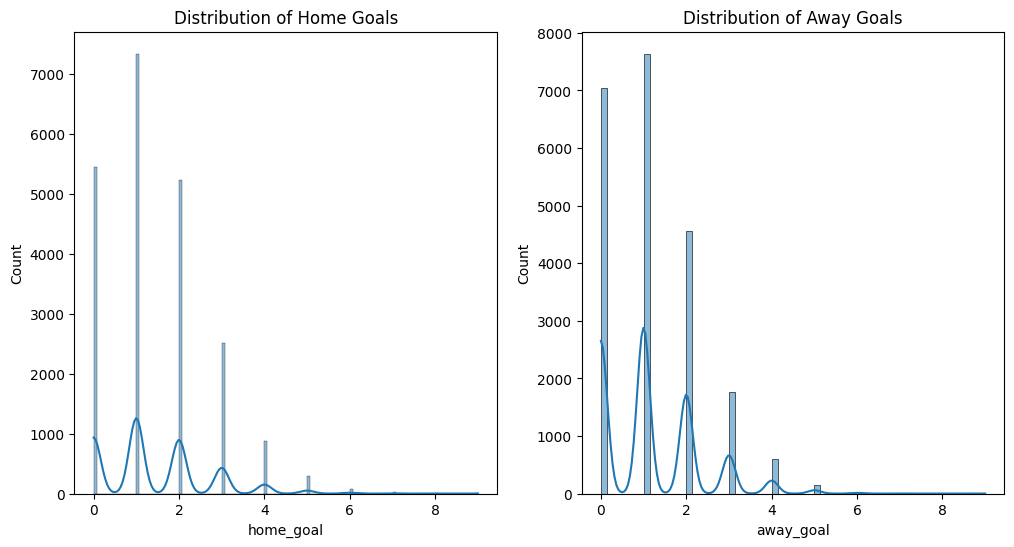

In [9]:
# Distribution of home_goal and away_goal
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=df, x='home_goal', kde=True, ax=ax[0])
sns.histplot(data=df, x='away_goal', kde=True, ax=ax[1])
ax[0].set(title='Distribution of Home Goals')
ax[1].set(title='Distribution of Away Goals')
plt.show()

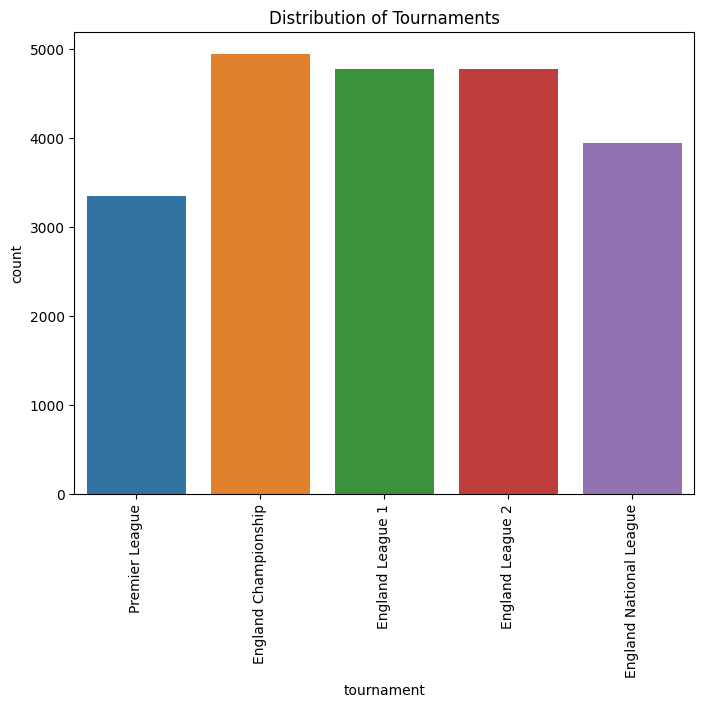

tournament
England Championship       4949
England League 1           4781
England League 2           4775
England National League    3944
Premier League             3352
Name: count, dtype: int64

In [10]:
# Distribution of tournament
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tournament')
plt.xticks(rotation=90)
plt.title('Distribution of Tournaments')
plt.show()
df['tournament'].value_counts()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


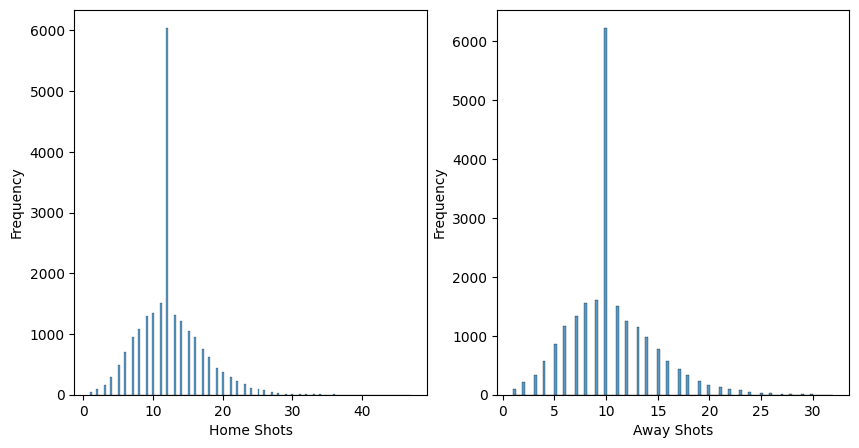

In [11]:
# Plotting the distribution of the home_shots and away_shots variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['home_shots'], ax=ax[0])
ax[0].set_xlabel('Home Shots')
ax[0].set_ylabel('Frequency')
sns.histplot(df['away_shots'], ax=ax[1])
ax[1].set_xlabel('Away Shots')
ax[1].set_ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


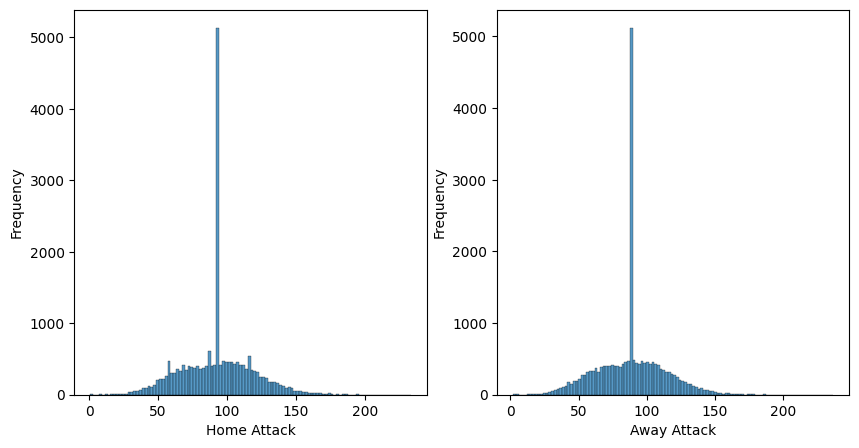

In [12]:
# Plotting the distribution of the home_attack and away_attack variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['home_attack'], ax=ax[0])
ax[0].set_xlabel('Home Attack')
ax[0].set_ylabel('Frequency')
sns.histplot(df['away_attack'], ax=ax[1])
ax[1].set_xlabel('Away Attack')
ax[1].set_ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


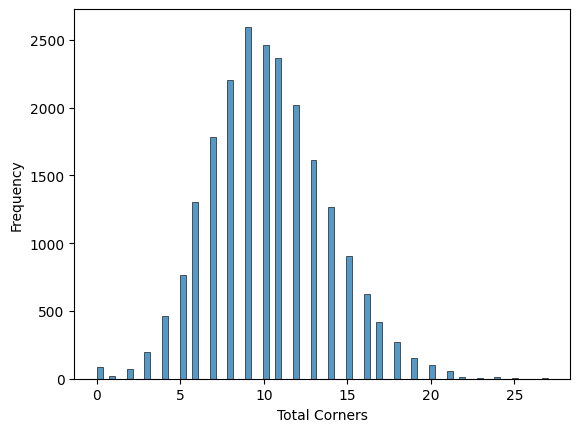

In [13]:
# Plotting the distribution of the total_corners variable
sns.histplot(df['total_corners'])
plt.xlabel('Total Corners')
plt.ylabel('Frequency')
plt.show()

Akan dilakukan Bivariate Analysis

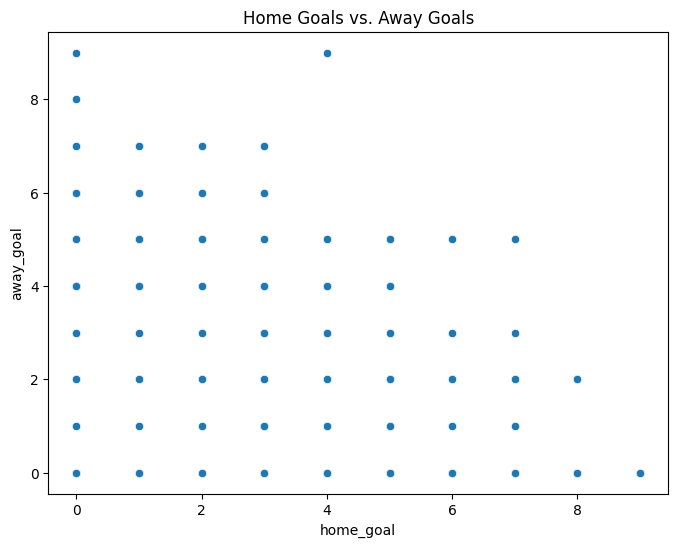

In [14]:
# Scatter plot of home_goal vs. away_goal
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='home_goal', y='away_goal')
plt.title('Home Goals vs. Away Goals')
plt.show()

Berikut pola distribusi cetak goal baik itu home goal atau away goal. Terlihat bahwasannya skor rendah (0-3) umum terjadinya di suatu pertandingan beserta skor imbang sedangkan skor dengan jumlah tinggi jarang terjadi.

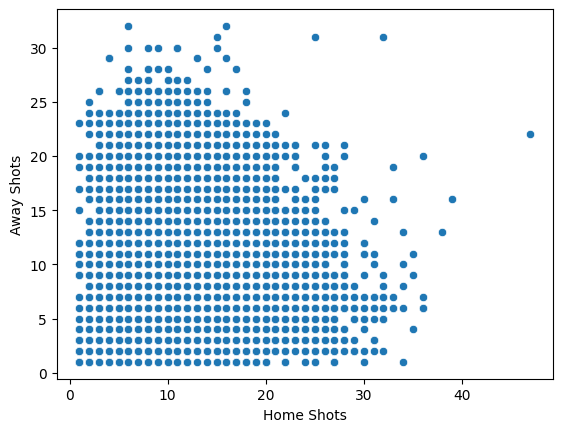

In [15]:
sns.scatterplot(data=df, x='home_shots', y='away_shots')
plt.xlabel('Home Shots')
plt.ylabel('Away Shots')
plt.show()

Sebagian besar distribusi tembakan berada di sisi kiri bawah yang menandakan mayoritas pertandingan memiliki jumlah tembakan yang relatif rendah. 

Terlihat ada korelasi negatif antara home shots dengan away shots. Jumlah tembakan tuan rumah meningkat, jumlah tembakan tamu menurun. Begitu sebaliknya

Terdapat beberapa pencilan terhadap beberapa pertandingan dimana jumalh tembakan antara home dan away memiliki jumlah yang tinggi

**Feature Engineering dan Data Preparation**

Di Feature Engineering, akan membuat peubah baru berdasarkan peubah peubah yang sudah ada di dataset sehingga dapat mempersiapkan dataset yang sudah ditambah dengan peubah yang baru

Disini, akan menambahkan peubah baru dari peubah date

In [16]:
# Extract year, month, day, and day of week from date column
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_week'] = pd.DatetimeIndex(df['date']).dayofweek


Akan dilakukan penambahan peubah baru yakni rata-rata membobol dan rata-rata kebobolan untuk melihat seberapa kuat tim dalam mencetak gol dan pertahanan tim berdasarkan 10 pertandingan. Tim dengan rata-rata membobol yang tinggi, menunjukan seberapa produktif dalam mencetak gol dan tim dengan rata-rata kebobolan yang rendah, menunjukan seberapa baik pertahanan tim 

Membuat peubah baru rata-rata kebobolan baik untuk home & away team

In [17]:
# Set the window size for rolling average
window_size = 10


# Create a new column for rolling average goals conceded by home team
df['home_rolling_avg_conceded'] = df.groupby('home')['away_goal'].rolling(window_size).mean().reset_index(0, drop=True)

# Create a new column for rolling average goals conceded by away team
df['away_rolling_avg_conceded'] = df.groupby('away')['home_goal'].rolling(window_size).mean().reset_index(0, drop=True)

df['home_rolling_avg_conceded'] = df['home_rolling_avg_conceded'].fillna(0)
df['home_rolling_avg_conceded'] = df['home_rolling_avg_conceded'].fillna(0)

Membuat peubah baru rata-rata membobol baik untuk home & away team

In [18]:
# calculate rolling average goals for home and away teams
df['rolling_avg_goals_home'] = df.groupby('home')['home_goal'].rolling(window=10, min_periods=1).mean().reset_index(0, drop=True)
df['rolling_avg_goals_away'] = df.groupby('away')['away_goal'].rolling(window=10, min_periods=1).mean().reset_index(0, drop=True)

In [19]:
# calculate the number of home and away wins for each team
home_wins = {}
away_wins = {}
for i, row in df.iterrows():
    home_team = row['home']
    away_team = row['away']
    if row['ht_diff'] > 0:
        home_wins[home_team] = home_wins.get(home_team, 0) + 1
    elif row['ht_diff'] < 0:
        away_wins[away_team] = away_wins.get(away_team, 0) + 1

# add the home and away win percentages to the dataframe
df['home_win_percent'] = df['home'].apply(lambda x: home_wins.get(x, 0) / (home_wins.get(x, 0) + away_wins.get(x, 0)) if (home_wins.get(x, 0) + away_wins.get(x, 0)) > 0 else 0)
df['away_win_percent'] = df['away'].apply(lambda x: away_wins.get(x, 0) / (home_wins.get(x, 0) + away_wins.get(x, 0)) if (home_wins.get(x, 0) + away_wins.get(x, 0)) > 0 else 0)

In [20]:
df["at_result"].tail()

21796    DRAW
21797    DRAW
21798    LOST
21799    LOST
21800    LOST
Name: at_result, dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21801 entries, 0 to 21800
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tournament                 21801 non-null  object 
 1   home                       21801 non-null  object 
 2   home_goal                  21801 non-null  float64
 3   away_goal                  21801 non-null  float64
 4   away                       21801 non-null  object 
 5   home_corner                21801 non-null  float64
 6   away_corner                21801 non-null  float64
 7   home_attack                21801 non-null  float64
 8   away_attack                21801 non-null  float64
 9   home_shots                 21801 non-null  float64
 10  away_shots                 21801 non-null  float64
 11  time                       21801 non-null  object 
 12  date                       21801 non-null  object 
 13  ht_diff                    21801 non-null  flo

Setelah menambahkan peubah baru, akan dilakukan  juga feature engineering terhadap peubah yang mempunyai tipe data kategorikal menjadi numerikal. Berdasarkan info diatas, terlihat beberapa peubah yang memiliki tipe data object / kategorikal yakkni peubah tournament, home, away, ht_result, at_result. Sehingga, akan diubah tipe data peubah tersebut menjadi numerikal dengan melakukan label encoder.

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode tournament column
df['tournament'] = le.fit_transform(df['tournament'])

# Encode home column
df['home'] = le.fit_transform(df['home'])

# Encode away column
df['away'] = le.fit_transform(df['away'])

# Encode ht_result column
df['ht_result'] = le.fit_transform(df['ht_result'])

# Encode at_result column
df['at_result'] = le.fit_transform(df['at_result'])

In [23]:
df.head()

,tournament,home,home_goal,away_goal,away,home_corner,away_corner,home_attack,away_attack,home_shots,...,year,month,day,day_of_week,home_rolling_avg_conceded,away_rolling_avg_conceded,rolling_avg_goals_home,rolling_avg_goals_away,home_win_percent,away_win_percent
0,4,5,0.0,0.0,31,0.0,0.0,93.0,88.0,12.0,...,2023,5,2,1,0.0,NaN,0.0,0.0,0.607735,0.471910
1,4,66,0.0,0.0,48,0.0,0.0,93.0,88.0,12.0,...,2023,5,1,0,0.0,NaN,0.0,0.0,0.591241,0.376068
2,4,69,0.0,0.0,118,0.0,0.0,93.0,88.0,12.0,...,2023,4,30,6,0.0,NaN,0.0,0.0,0.561576,0.403315
3,4,15,0.0,0.0,66,0.0,0.0,93.0,88.0,12.0,...,2023,4,30,6,0.0,NaN,0.0,0.0,0.565217,0.458065
4,4,51,0.0,0.0,75,0.0,0.0,93.0,88.0,12.0,...,2023,4,30,6,0.0,NaN,0.0,0.0,0.566667,0.458515


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21801 entries, 0 to 21800
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tournament                 21801 non-null  int64  
 1   home                       21801 non-null  int64  
 2   home_goal                  21801 non-null  float64
 3   away_goal                  21801 non-null  float64
 4   away                       21801 non-null  int64  
 5   home_corner                21801 non-null  float64
 6   away_corner                21801 non-null  float64
 7   home_attack                21801 non-null  float64
 8   away_attack                21801 non-null  float64
 9   home_shots                 21801 non-null  float64
 10  away_shots                 21801 non-null  float64
 11  time                       21801 non-null  object 
 12  date                       21801 non-null  object 
 13  ht_diff                    21801 non-null  flo

In [25]:
df.describe()

,tournament,home,home_goal,away_goal,away,home_corner,away_corner,home_attack,away_attack,home_shots,...,year,month,day,day_of_week,home_rolling_avg_conceded,away_rolling_avg_conceded,rolling_avg_goals_home,rolling_avg_goals_away,home_win_percent,away_win_percent
count,21801.000000,21801.000000,21801.000000,21801.000000,21801.000000,21801.000000,21801.000000,21801.000000,21801.000000,21801.000000,...,21801.000000,21801.000000,21801.000000,21801.000000,21801.000000,20611.000000,21801.000000,21801.000000,21801.000000,21801.000000
mean,1.815100,65.724049,1.421770,1.169258,66.196459,5.555158,4.724875,92.980872,88.294115,12.305215,...,2018.524517,6.526490,16.026146,3.935003,1.103215,1.417651,1.407185,1.160504,0.580596,0.419552
std,1.374467,38.464502,1.225359,1.115147,38.452142,2.894284,2.661308,25.186223,24.557159,4.418700,...,2.592590,3.838715,8.863933,1.839137,0.472734,0.451945,0.493568,0.428309,0.036144,0.036522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,...,2013.000000,1.000000,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,31.000000,1.000000,0.000000,32.000000,3.000000,3.000000,78.000000,74.000000,10.000000,...,2016.000000,3.000000,8.000000,2.000000,0.800000,1.100000,1.100000,0.900000,0.558140,0.395522
50%,2.000000,67.000000,1.000000,1.000000,68.000000,5.000000,4.000000,93.000000,88.000000,12.000000,...,2018.000000,8.000000,17.000000,5.000000,1.100000,1.400000,1.400000,1.100000,0.583893,0.416107
75%,3.000000,98.000000,2.000000,2.000000,98.000000,7.000000,6.000000,107.000000,102.000000,14.000000,...,2021.000000,10.000000,24.000000,5.000000,1.400000,1.700000,1.700000,1.400000,0.604478,0.441860
max,4.000000,132.000000,9.000000,9.000000,133.000000,20.000000,21.000000,233.000000,237.000000,47.000000,...,2023.000000,12.000000,31.000000,6.000000,3.200000,3.600000,5.000000,4.000000,0.777778,1.000000


Dilakukan normalisasi terhadap beberapa peubah dikarenakan mereka memiliki rentang nilai yang berbeda dan besar satu sama lain. Dilakukan normalisasi untuk memastikan perhitungan yang dilakukan model terhadap semua fitur diperlukan secara adil, sehingga tidak ada fitur yang mendominasi karena memiliki rentang nilai yang besar

In [26]:
from sklearn.preprocessing import StandardScaler

# Select the columns to normalize
columns_to_normalize = ['home_corner', 'away_corner', 'home_attack', 'away_attack', 'home_shots', 'away_shots']

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

**Menerapkan model clustering**

Alasan memilih K-means dan fuzzy sebagai model clustering yang dipilih dikarenakan pada model k-means, fitur numerik dapat dipisahkan berdasarkan jarak antar titik. Dalam dataset diatas, peubah seperti attacks, corners, dan shots, dapat di clustering berdasarkan pola perilaku nya dan mengapa model fuzzy c-means dipilih dikarenakan ada keanggotan pada 1 cluster memiliki keanggotan pada cluster lainnya atau parsial. Contoh, seperti jumlah serangan atau gol, mungkin memiliki pola yang tumpang tindih dengan beberapa cluster. seperti jumlah serangan atau gol, mungkin memiliki pola yang tumpang tindih dengan beberapa cluster. Contoh, seperti jumlah serangan dan gol memiliki pola yang tumpah tindih dengan cluster lainnya

PCA

PCA (Principal Component Analysis) adalah teknik yang sering digunakan untuk mengurangi dimensi dari dataset dengan banyak fitur. PCA dapat sangat berguna dalam menjelajahi struktur dan pola tersembunyi di dalam data dengan cara merangkum variasi antar variabel dalam bentuk beberapa komponen utama yang mewakili sebagian besar varians di dalam dataset. Dan juga, penggunaan PCA dapat mengurangi noise, dan meningkatkan interpretabilitas, sambil mempertahakan informasi penting dalam dataset

In [27]:
unique_home_categories = df['home'].unique()

sorted(unique_home_categories)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132]

Terdapat 132 uniques di dalam dataset dalam peubah home

In [28]:
home_category_subsets = []
for category in unique_home_categories:
    subset = df[df['home'] == category]
    home_category_subsets.append(subset)

In [29]:
relevant_columns = ['home_goal', 'away_goal', 'home_corner', 'away_corner', 'home_attack', 'away_attack', 'home_shots', 'away_shots']
subset_columns = []
for subset in home_category_subsets:
    subset_col = subset[relevant_columns]
    subset_columns.append(subset_col)

In [30]:
from sklearn.decomposition import PCA

pca_data = []
for subset in subset_columns:
    if subset.shape[1] >= 2 and subset.shape[0] >= 2:  # Pastikan ada cukup fitur dan sampel
        pca = PCA(n_components=2)
        pca_transformed = pca.fit_transform(subset)
        pca_data.append(pca_transformed)
    else:
        print("Subset memiliki terlalu sedikit fitur atau sampel:", subset.shape)



Subset memiliki terlalu sedikit fitur atau sampel: (1, 8)


In [31]:
from sklearn.feature_selection import VarianceThreshold

filtered_features = []
for subset in subset_columns:
    if subset.shape[1] >= 2 and subset.shape[0] >= 2:  # Pastikan ada cukup fitur dan sampel
        # Menghapus fitur dengan variansi rendah
        selector = VarianceThreshold(threshold=0.1)  # Ubah threshold sesuai kebutuhan
        subset_filtered = selector.fit_transform(subset)
        
        # Menyimpan fitur yang telah difilter
        filtered_features.append(subset_filtered)
    else:
        print("Subset memiliki terlalu sedikit fitur atau sampel:", subset.shape)


Subset memiliki terlalu sedikit fitur atau sampel: (1, 8)


Tidak diperlukan dimensional reduction dikarenakan fitur atau sampel yang dihasilkan kecil. Disini akan dicoba melakukan penggabungan terhadap subset yang lebih kecil

In [32]:
# Misalnya, gabungkan subset yang lebih kecil
all_subsets = pd.concat(subset_columns, ignore_index=True)

# Periksa ukuran gabungan
print("Ukuran data setelah penggabungan:", all_subsets.shape)

# Lakukan feature selection atau clustering jika ukuran data memadai
if all_subsets.shape[0] >= 2 and all_subsets.shape[1] >= 2:
    # Misalnya, melakukan feature selection dengan VarianceThreshold
    from sklearn.feature_selection import VarianceThreshold
    selector = VarianceThreshold(threshold=0.1)
    all_subsets_filtered = selector.fit_transform(all_subsets)
    print("Fitur yang dipilih:", all_subsets_filtered.shape)
else:
    print("Data masih terlalu kecil untuk analisis.")


Ukuran data setelah penggabungan: (21801, 8)
Fitur yang dipilih: (21801, 8)


Dikarenakan jumlah fitur yang masih kecil, tidak diperlukan Dimensional reduction, dan juga dikarenakn fokus terhadap perbandingan algoritma, makan akan dilanjutkan penerapan algoritma clustering.

**Implementasi Algoritma**

Algoritma yang dipakai untuk perbandingan ialah algoritma k-means dan fuzzy c-means. Sebelumnya, akan dilakukan pencarian clusters yang optimal menggunakan elbow method sehingga pembentukan cluster akan sama terhadap 2 algoritma.

In [33]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

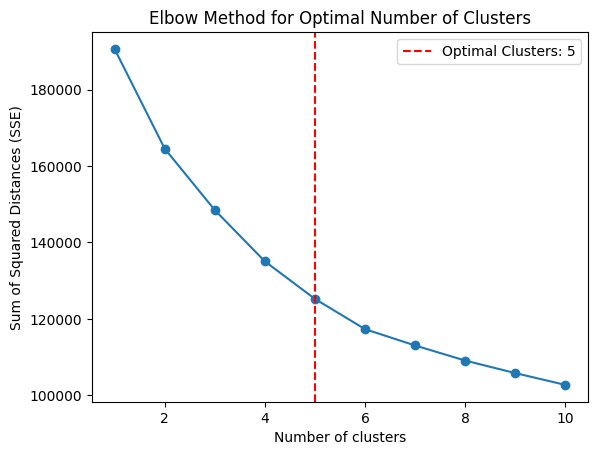

Jumlah cluster optimal: 5


In [34]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Elbow method untuk mencari jumlah cluster optimal
sse = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_subsets_filtered)
    sse.append(kmeans.inertia_)

# Mendeteksi elbow menggunakan KneeLocator
kneedle = KneeLocator(cluster_range, sse, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

# Plot hasil Elbow Method
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')

# Tambahkan garis vertikal merah pada cluster optimal
plt.axvline(x=optimal_clusters, color='red', linestyle='--', label=f'Optimal Clusters: {optimal_clusters}')
plt.legend()
plt.show()

print(f"Jumlah cluster optimal: {optimal_clusters}")


Didapatkan cluster yang optimal adalah 5. Lalu, akan dimasukan cluster yang optimal tersebut ke dalam algoritma k-means dan fuzzy c-means.

Algoritma K-means

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


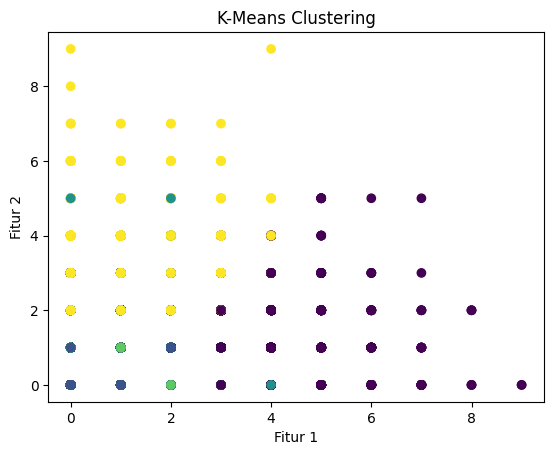

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Misalkan hasil dari elbow method menunjukkan cluster optimal adalah 5
optimal_clusters = 5

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(all_subsets_filtered)

# Visualisasi hasil K-Means clustering (untuk 2 fitur pertama jika lebih dari 2 fitur)
plt.scatter(all_subsets_filtered[:, 0], all_subsets_filtered[:, 1], c=kmeans_labels)
plt.title("K-Means Clustering")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()


Algoritma Fuzzy C-means

In [36]:
pip install fuzzy-c-means

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.14.6
    Uninstalling pydantic_core-2.14.6:
      Successfully uninstalled pydantic_core-2.14.6
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.5.3
    Uninstalling pydantic-2.5.3:
      Successfully uninstalled pydantic-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storag

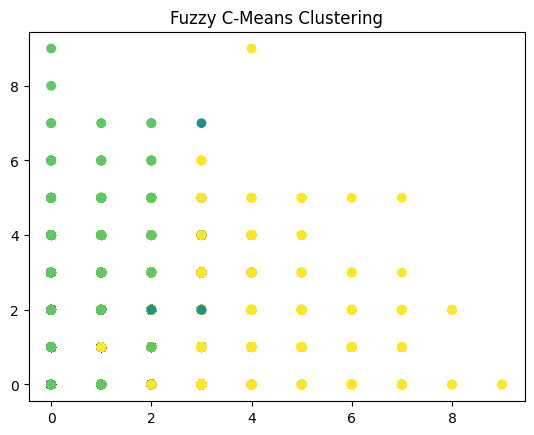

In [37]:
from fcmeans import FCM
import matplotlib.pyplot as plt

# Fuzzy C-Means Clustering
fcm = FCM(n_clusters=5)  # Ubah n_clusters sesuai kebutuhan
fcm.fit(all_subsets_filtered)

# Mendapatkan label dan probabilitas keanggotaan
fcm_labels = fcm.predict(all_subsets_filtered)
membership = fcm.u  # Matriks keanggotaan

# Visualisasi hasil Fuzzy C-Means clustering
plt.scatter(all_subsets_filtered[:, 0], all_subsets_filtered[:, 1], c=fcm_labels)
plt.title("Fuzzy C-Means Clustering")
plt.show()



**Evaluasi Model**

Dilakuakan evaluasi model menggunakan silhoutte score, davies bouldin score, dan calinski harabasz score. Silhoute score yaitu mengukur seberapa dekat antara sampel dalam 1 kluster dengan sampel di kluster lain. Lalu, davies bouldin score yaitu mengukur rata-rata rasio jarak antar kluster dengan ukuran kluster dan calinski harabasz yaitu  Mengukur rasio antara jarak antar - kluster dengan jarak dalam kluster

Index nilai nya yakni;
1. Silhoute score : -1 s/d 1. Semakin dekat ke 1, semakin baik klustering yang terpisah dan Semakin dekat -1, semakin buruk klustering
2.Davies-Bouldin : Nilai berkisar dari 0 ke atas. Semakin kecil nilainya, semakin baik hasil klustering.
3.Calinski-Harabasz : Tidak ada batas maksimum. Semakin tinggi nilainya, semakin baik hasil klustering

In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Hasil evaluasi akan disimpan dalam list terlebih dahulu
results = []

# === Evaluasi K-Means ===
silhouette_kmeans = silhouette_score(all_subsets_filtered, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(all_subsets_filtered, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(all_subsets_filtered, kmeans_labels)

# Tambahkan hasil evaluasi K-Means ke list
results.append({
    'Model': 'K-Means',
    'Silhouette Score': silhouette_kmeans,
    'Davies-Bouldin Score': davies_bouldin_kmeans,
    'Calinski-Harabasz Score': calinski_harabasz_kmeans
})

# === Evaluasi Fuzzy C-Means ===
silhouette_fcm = silhouette_score(all_subsets_filtered, fcm_labels)
davies_bouldin_fcm = davies_bouldin_score(all_subsets_filtered, fcm_labels)
calinski_harabasz_fcm = calinski_harabasz_score(all_subsets_filtered, fcm_labels)

# Tambahkan hasil evaluasi Fuzzy C-Means ke list
results.append({
    'Model': 'Fuzzy C-Means',
    'Silhouette Score': silhouette_fcm,
    'Davies-Bouldin Score': davies_bouldin_fcm,
    'Calinski-Harabasz Score': calinski_harabasz_fcm
})

# Buat DataFrame dari hasil evaluasi
evaluation_df = pd.DataFrame(results)

# Tampilkan DataFrame
print(evaluation_df)


           Model  Silhouette Score  Davies-Bouldin Score  \
0        K-Means          0.129864              1.829963   
1  Fuzzy C-Means         -0.075110              2.482041   

   Calinski-Harabasz Score  
0              2847.591435  
1               983.867517  


Berdasarkan hasil di atas, didapatkan bahwa k-means merupakan model terbaik dibandingkan Fuzzy c-means dalam melakukan clustering berdasarkan dataset english football